In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as graph

import seaborn as sns

In [2]:
x = np.linspace(0, 10, 100)

(-0.5, 10.5, -1.0999445244849302, 1.0999973583088063)

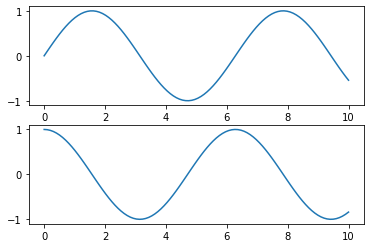

In [11]:
fig, ax = graph.subplots(2)

ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

graph.axis('tight')

# Visualizing Errors

In [3]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

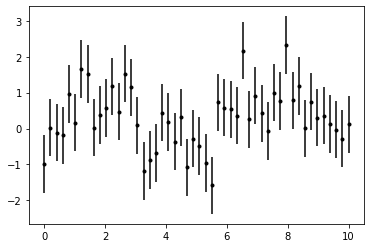

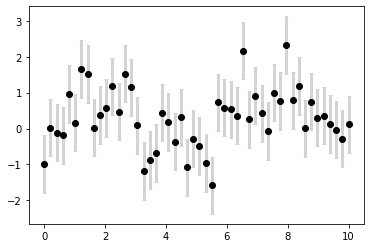

In [7]:
graph.errorbar(x, y, yerr=dy, fmt= '.k')
graph.show()

graph.errorbar(x, y, yerr=dy, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=2)
graph.show()

In [17]:
from sklearn.gaussian_process import GaussianProcessRegressor

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2 * np.sqrt(MSE)  # 2*sigma ~ 95% confidence region

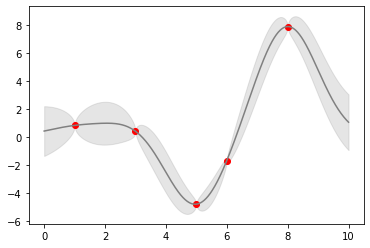

In [19]:
# Visualize the result
graph.plot(xdata, ydata, 'or')
graph.plot(xfit, yfit, '-', color='gray')

graph.fill_between(xfit, yfit - dyfit, yfit + dyfit, color='gray', alpha=0.2)
graph.show()

# Density and Contour

In [2]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [9]:
x = np.linspace(0, 5, 40)
y = np.linspace(0, 5, 50)

x, y = np.meshgrid(x, y)
z = f(x, y)

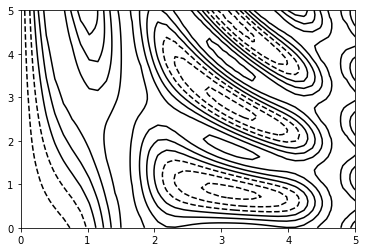

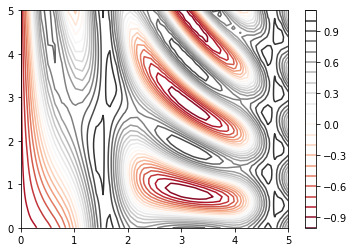

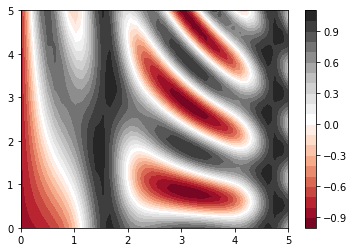

In [10]:
graph.contour(x, y, z, colors='black');
graph.show()

graph.contour(x, y, z, 20, cmap='RdGy');
graph.colorbar()
graph.show()

graph.contourf(x, y, z, 20, cmap='RdGy');
graph.colorbar()
graph.show()

/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  after removing the cwd from sys.path.


(0.0, 5.0, 0.0, 5.0)

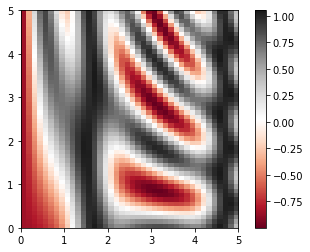

In [11]:
graph.imshow(z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy')
graph.colorbar()
graph.axis(aspect='image')

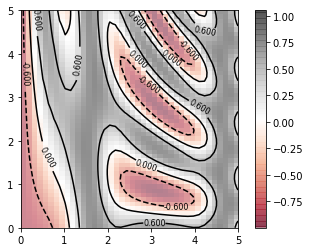

In [12]:
contours = graph.contour(x, y, z, 3, colors='black')
graph.clabel(contours, inline=True, fontsize=8)

graph.imshow(z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
graph.colorbar()

# 2 Dimensional Histograms

In [17]:
mean = [0, 0.25]
cov = [[1, 2], [1, 2]]

x, y = np.random.multivariate_normal(mean, cov, 10000).T

/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  after removing the cwd from sys.path.


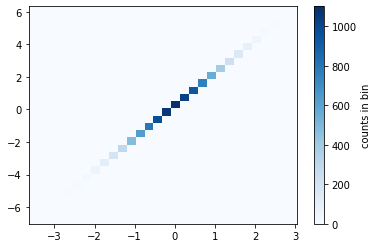

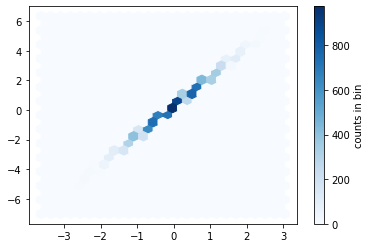

In [18]:
graph.hist2d(x, y, bins=30, cmap='Blues')

cb = graph.colorbar()
cb.set_label('counts in bin')
graph.show()

graph.hexbin(x, y, gridsize=25, cmap='Blues')

cb = graph.colorbar()
cb.set_label('counts in bin')
graph.show()

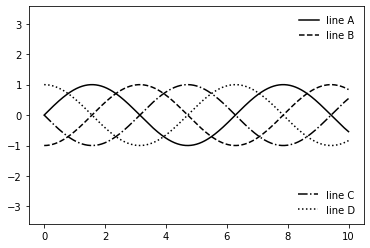

In [24]:
fig, ax = graph.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2), styles[i], color='black')
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'], loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'], loc='lower right', frameon=False)
ax.add_artist(leg)
graph.show()

# Subplots

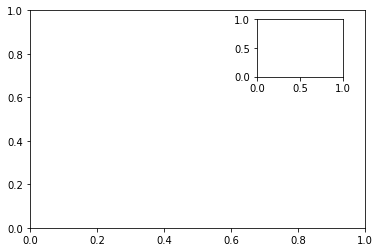

In [135]:
ax1 = graph.axes()  # standard axes
ax2 = graph.axes([0.65, 0.65, 0.2, 0.2])
graph.show()

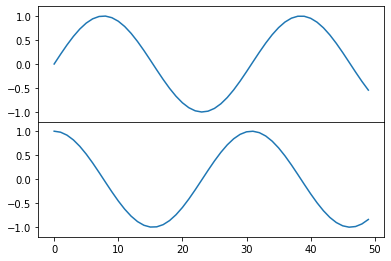

In [137]:
fig = graph.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))
graph.show()

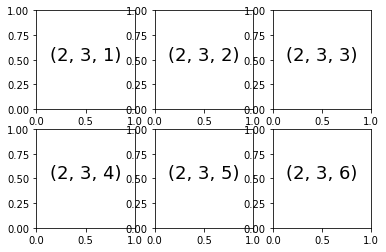

In [138]:
for i in range(1, 7):
    graph.subplot(2, 3, i)
    graph.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')
graph.show()

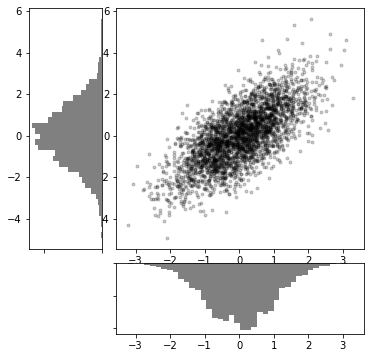

In [139]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = graph.figure(figsize=(6, 6))
grid = graph.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

## Transforms

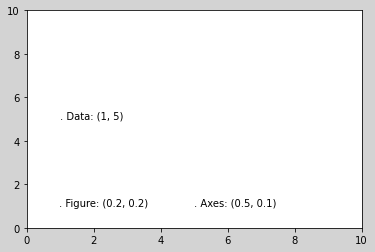

In [141]:
fig, ax = graph.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure)
graph.show()

## Arrows

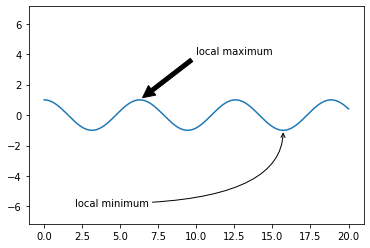

In [144]:
x = np.linspace(0, 20, 1000)
graph.plot(x, np.cos(x))
graph.axis('equal')

graph.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

graph.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"))
graph.show()

## MAjor and Minor Ticks

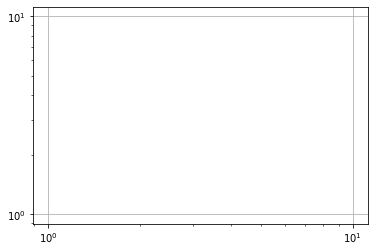

In [148]:
graph.axes(xscale='log', yscale='log')
graph.grid()
graph.show()

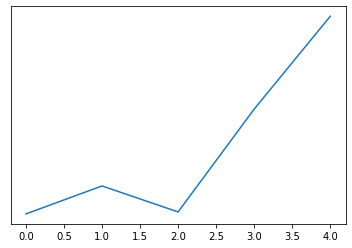

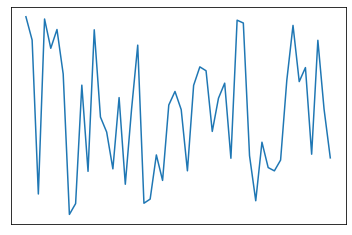

In [157]:
x = np.arange(5)
y = x*np.random.randint(100, size=len(x))
graph.plot(x, y)
graph.yticks([])
graph.show()

ax = graph.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(graph.NullLocator())
graph.xticks([])
graph.show()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/arshad/scikit_learn_data


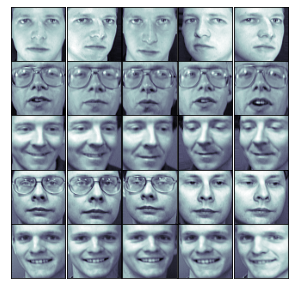

In [158]:
fig, ax = graph.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

# Get some face data from scikit-learn
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(graph.NullLocator())
        ax[i, j].yaxis.set_major_locator(graph.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap="bone")

### Reduce number of ticks

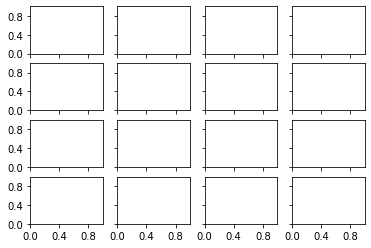

In [160]:
fig, ax = graph.subplots(4, 4, sharex=True, sharey=True)

for axi in ax.flat:
    axi.xaxis.set_major_locator(graph.MaxNLocator(3))
    axi.yaxis.set_major_locator(graph.MaxNLocator(3))
fig.show()

## Change styles

In [164]:
graph.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

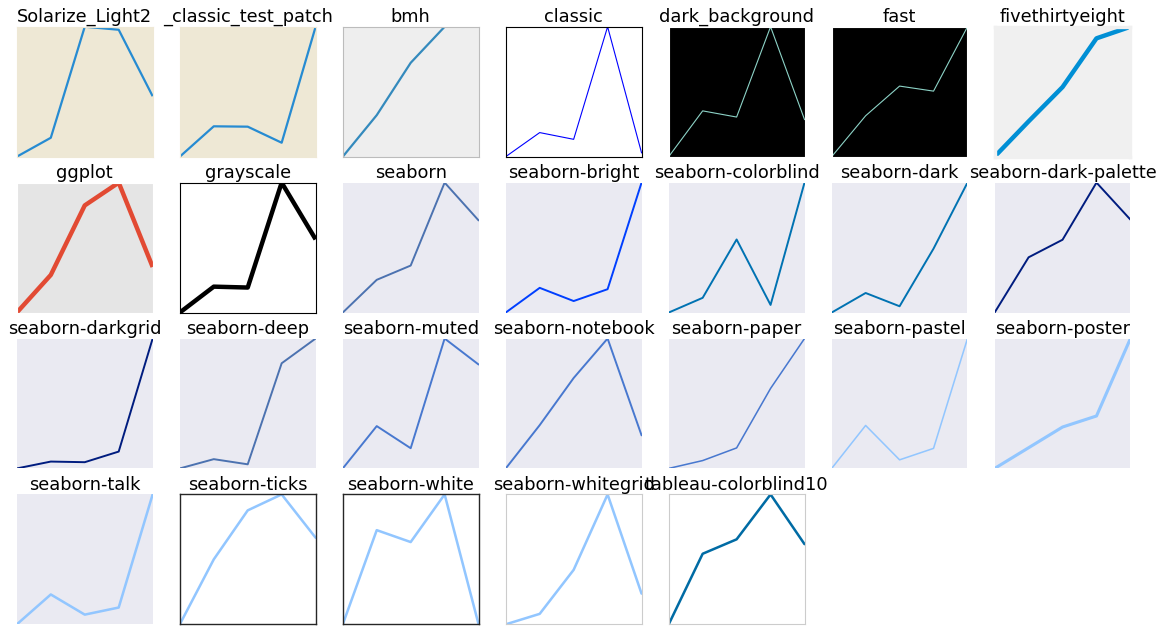

In [191]:
graph.figure(figsize=(16, 9))
fig.subplots_adjust(hspace=1.5, wspace=1.5)

for i, style in zip(range(1, len(graph.style.available) + 1), graph.style.available):
    graph.style.use(style)
    x = np.arange(5)
    y = x*np.random.randint(100, size=len(x))
    graph.subplot(4, 7, i)
    graph.title(style, color='black', fontsize=16)
    graph.plot(x, y)
    graph.yticks([])
    graph.xticks([])
#     ax = fig.add_subplot(6, 5, i)
#     ax.set_title(style)
#     ax.plot(x, y)
#     ax.yaxis.set_major_locator(graph.NullLocator())
#     ax.xaxis.set_major_locator(graph.NullLocator())

graph.show()

# 3-D Plotting

In [2]:
from mpl_toolkits import mplot3d

<IPython.core.display.Javascript object>


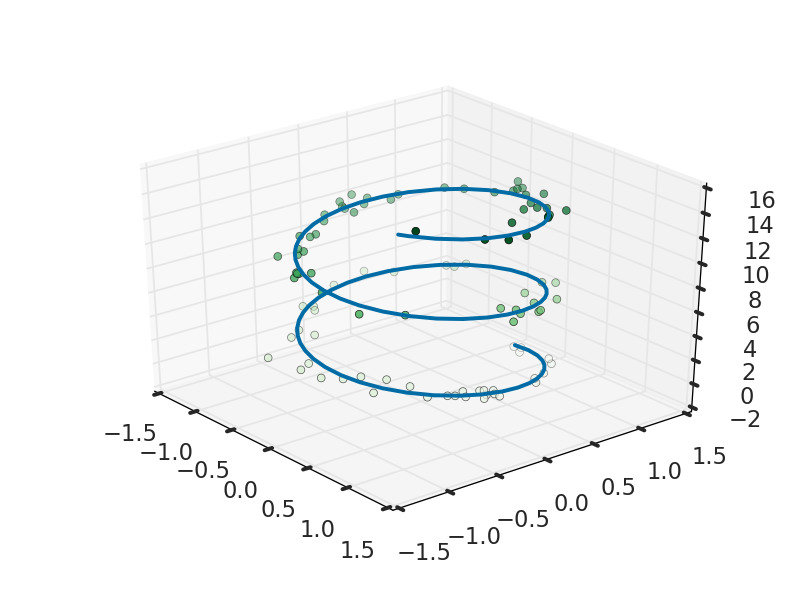

In [251]:
%matplotlib notebook
ax = graph.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)

ax.plot3D(xline, yline, zline)

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

graph.show()

In [3]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

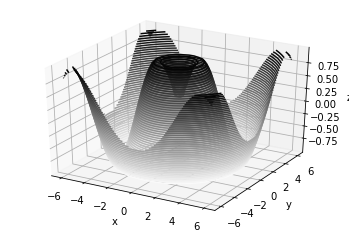

In [4]:
fig = graph.figure()
ax = graph.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

graph.show()

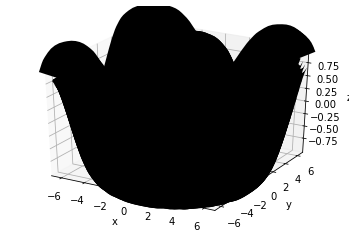

In [5]:
fig = graph.figure()
ax = graph.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, 50, color='black')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

graph.show()

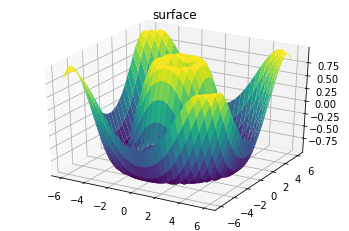

In [6]:
ax = graph.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface')
graph.show()

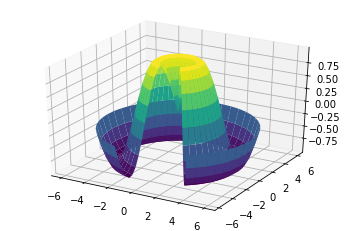

In [7]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = graph.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');

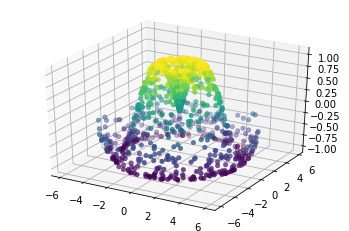

In [9]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

ax = graph.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5)
graph.show()

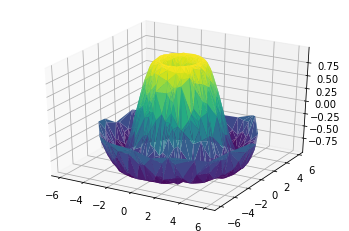

In [11]:
ax = graph.axes(projection='3d')
ax.plot_trisurf(x, y, z, cmap='viridis', linewidth=0.5)
graph.show()

# Seaborn

In [12]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

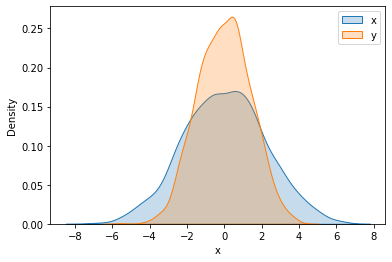

In [18]:
for col in 'xy':
    sns.kdeplot(x=col, data=data, shade=True, label=col)
    graph.legend()

/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


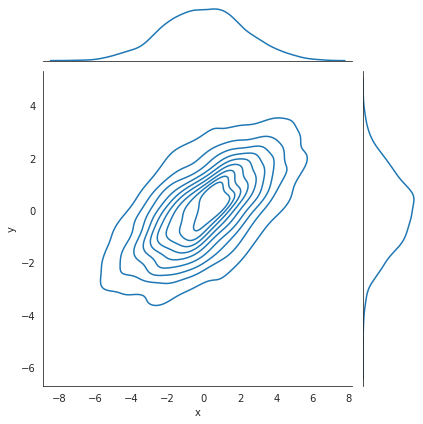

In [21]:
with sns.axes_style('white'):
    sns.jointplot('x', 'y', data=data, kind='kde')
graph.show()

/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


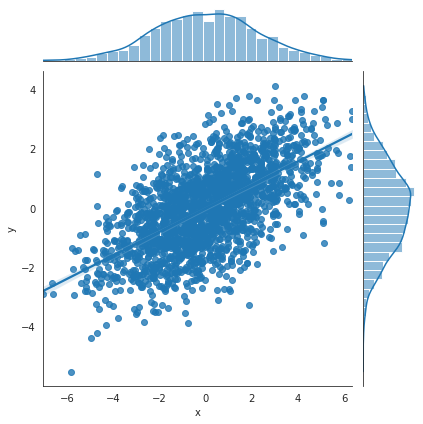

In [27]:
with sns.axes_style('white'):
    sns.jointplot('x', 'y', data=data, kind='reg')
graph.show()

In [22]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


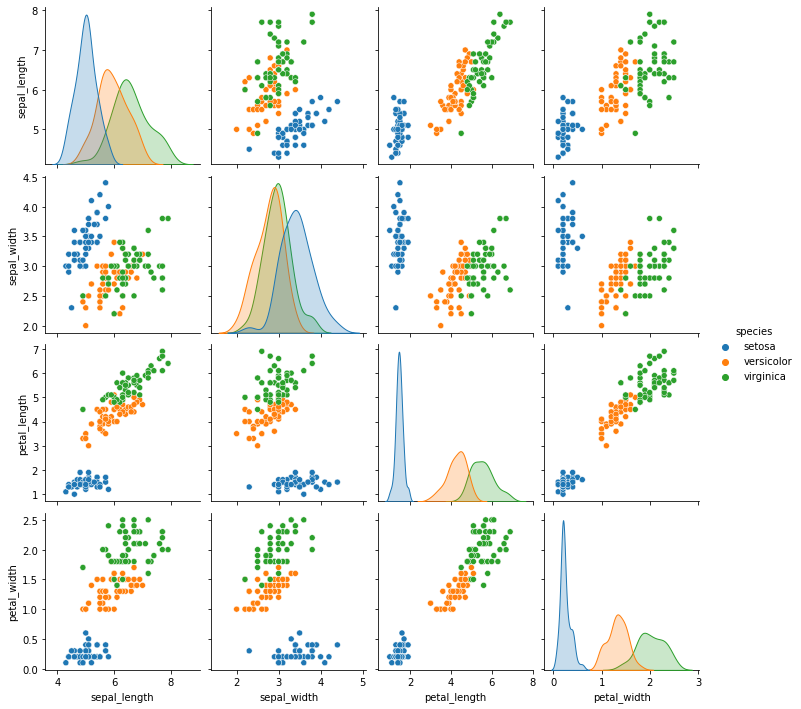

In [26]:
sns.pairplot(iris, hue='species', height=2.5)
graph.show()

In [29]:
tips = sns.load_dataset('tips')
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


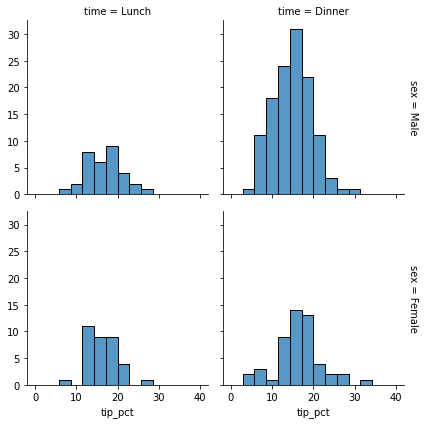

In [31]:
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(sns.histplot, "tip_pct", bins=np.linspace(0, 40, 15))
graph.show()

/home/arshad/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


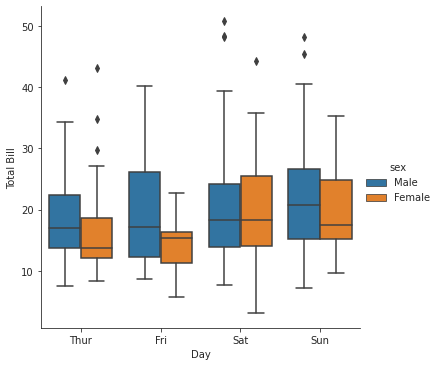

In [33]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill")

In [94]:
def count_islands(M):
    if (M == None) or (M == [[]]):
        return 0
   
    islands = 0
    rows = len(M)
    cols = len(M[0])
    
    for i in range(rows):
        for j in range(cols):
            if M[i][j] == 1:
                islands +=1
                parts_of_island(M ,i, j)
    return islands

def parts_of_island(M, i, j):
    

In [95]:
mat = [[1, 0, 1, 1], 
       [0, 1, 0, 1]]
print(len(mat[1]))

4


In [96]:
count_islands(mat)

5